In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys, os

from pathlib import Path
sys.path.append(str(Path(os.getcwd()).parent))

import pandas as pd
from general.dat_helper import group_by_mean
from glob import glob

print(os.getcwd())

from general.plot_settings import paper_settings, generate_plt_styles, colors
plt.rcParams.update(paper_settings)
colors = colors[0:]
colors = ['red', 'blue']
styles = generate_plt_styles(colors=colors)
plt.rcParams['lines.markersize'] = 4
plt.rcParams['legend.fontsize'] = 7

f:\GitHub\ChiPyLab\examples


In [2]:
files = ["2025-03-26_E_e.dat", "2025-03-26_F_e.dat"]

data_folder = os.path.join("..", "data", "ac_loss_rates")
files = glob(os.path.join(data_folder, '*'))

dfs = []
for file in files:
    dfs.append(pd.read_table(file, delimiter=',')) # making dataframe of chosen data

print(dfs[0].columns)

Index(['cyc', 'time', 'cyc.1', 'ROIsum', 'fBg', 'fA1', 'fWidth1', 'fCtr1',
       'fA2', 'fWidth2', 'fCtr2', 'box1', 'box2', 'box3', 'box4', 'box5',
       'box6', 'box7', 'box8', 'box9', 'Nfit', 'BZ-2', 'BZ-1', 'BZ0', 'BZ1',
       'BZ2', 'Excited', 'c5', 'c7', 'c9', 'fraction95', 'fraction75',
       'fraction97', 'sum95', 'ROIsqsum', 'c5cwc', 'c9cwc', 'two2D_bg',
       'two2D_a1', 'two2D_sh1', 'two2D_sv1', 'two2D_ch1', 'two2D_cv1',
       'two2D_a2', 'two2D_sh2', 'two2D_sv2', 'two2D_ch2', 'two2D_cv2',
       'two2D_chd', 'two2D_cvd'],
      dtype='object')


In [3]:
for df, file in zip(dfs, files):
    print(file, len(df))

..\data\ac_loss_rates\2025-03-26_E_e.dat 68
..\data\ac_loss_rates\2025-03-26_F_e.dat 63


Fit parameters for dataset 0: [1536.82969222   47.70603804  531.54591651] ± [36.11538413  2.88027432 37.40372439]
Loss correction is 1.4653505843978856
Fit parameters for dataset 1: [728.37034449  61.6313737  367.24852569] ± [39.7351348   8.19183739 45.26361724]
Loss correction is 1.3038373364592741


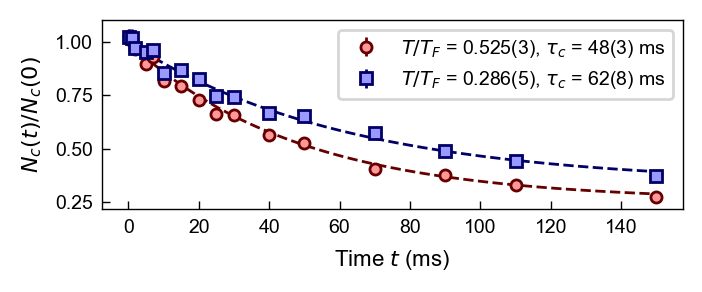

In [5]:
from scipy.optimize import curve_fit 


def lineshape(t, N_0, tau, C):
    return N_0 * np.exp(-t / tau) + C


fig, ax = plt.subplots(1, 1, figsize=(3.5,1.5))

xlabel = r'Time $t$ (ms)'
ylabel = r'$N_c(t)/N_c(0)$'
ax.set(xlabel=xlabel, ylabel=ylabel)
scan_name = 'time'

labels = ['T = 500(10) nK', 'T = 186(5) nK']
labels = [r'$T/T_F$ = 0.525(3)', r'$T/T_F$ = 0.286(5)']

for i, df_i in enumerate(dfs):
    sty = styles[i]
    df = group_by_mean(df_i, scan_name)

    X = df[scan_name].to_numpy()
    Y = df['c5'].to_numpy()
    EY = df['em_c5'].to_numpy()

    popt, pcov = curve_fit(lineshape, X, Y, sigma=EY, p0=[np.max(Y), 100, np.min(Y)])
    perr = np.sqrt(np.diag(pcov))
    print(f"Fit parameters for dataset {i}: {popt} ± {perr}")

    norm = popt[0] + popt[2]
    X_fit = np.linspace(np.min(X), np.max(X), 100)
    Y_fit = lineshape(X_fit, *popt)/norm
    ax.plot(X_fit, Y_fit, color=sty['color'], linestyle='--')

    label = labels[i] + r", $\tau_c$ = " + f"{popt[1]:.0f}({perr[1]:.0f}) ms"
    ax.errorbar(X, Y/norm, EY/norm, **sty, label=label)

    print(f"Loss correction is {norm/lineshape(26.6, *popt)}")

ax.legend()

fig.tight_layout()
fig.savefig("outputs/ac_loss_rate_estimates.pdf")
plt.show()

In [7]:
df['em_c5']

0     39.269396
1     48.680350
2     23.403598
3     25.597889
4     16.403169
5     18.128791
6     29.190767
7     12.906561
8     19.410589
9     23.046042
10     8.697148
11    11.494038
12    19.235042
13    10.222826
14    23.778859
15    21.644024
Name: em_c5, dtype: float64